<a href="https://colab.research.google.com/github/ankitmeena7007-beep/Experiment-10/blob/main/Experiment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


file_path = "/Mall_Customers.xls"

try:
    df = pd.read_csv(file_path, encoding='latin1')
    print(" File loaded successfully as CSV!")
except Exception as e:
    print(" Error reading as CSV, trying Excel instead...")
    df = pd.read_excel(file_path, engine='openpyxl')


print("\n Dataset Preview:")
display(df.head())

print("\n Basic Info:")
print(df.info())

print("\n Summary Statistics:")
display(df.describe())


 File loaded successfully as CSV!

 Dataset Preview:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40



 Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

 Summary Statistics:


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


 Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


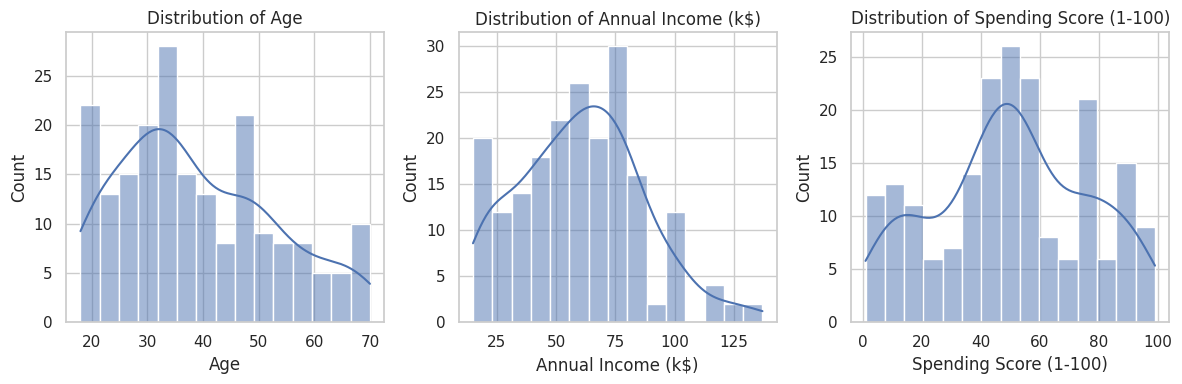

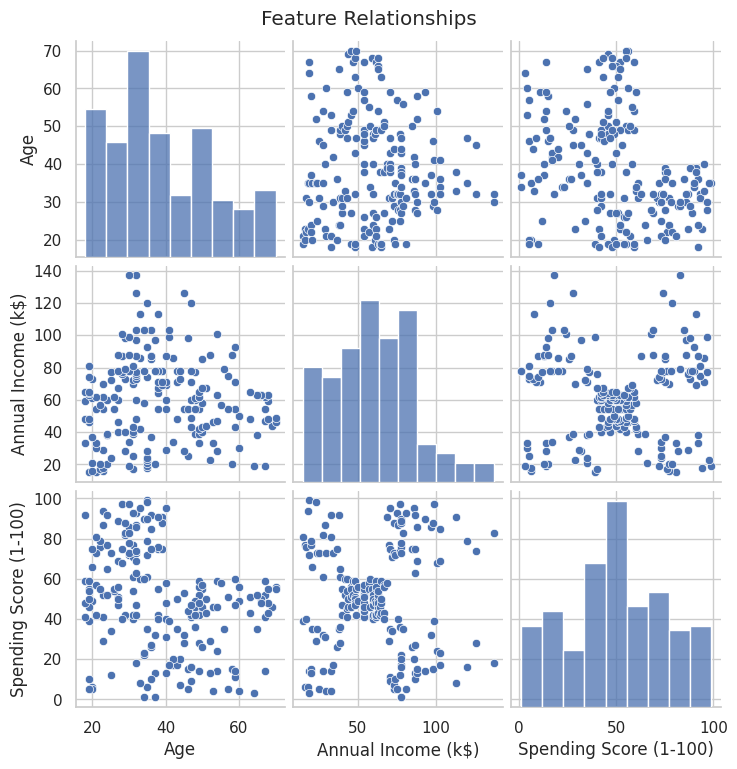

In [ ]:

print(" Missing Values:")
print(df.isnull().sum())


numeric_cols = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

plt.figure(figsize=(12, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


sns.pairplot(df[numeric_cols])
plt.suptitle("Feature Relationships", y=1.02)
plt.show()


In [ ]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(" Normalized Data:")
display(df_scaled.head())


 Normalized Data:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,0.019231,0.000000,0.387755
1,2,Male,0.057692,0.000000,0.816327
2,3,Female,0.038462,0.008197,0.051020
3,4,Female,0.096154,0.008197,0.775510
4,5,Female,0.250000,0.016393,0.397959


In [ ]:

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))


def initialize_centroids(X, k, random_state=None):
    if random_state:
        np.random.seed(random_state)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]


def assign_clusters(X, centroids):
    distances = np.array([[euclidean_distance(x, c) for c in centroids] for x in X])
    return np.argmin(distances, axis=1)


def update_centroids(X, labels, k):
    new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
    return new_centroids

def compute_inertia(X, labels, centroids):
    inertia = 0
    for i in range(len(centroids)):
        inertia += np.sum((X[labels == i] - centroids[i])**2)
    return inertia


def kmeans(X, k, max_iters=100, tol=1e-4, random_state=None):
    centroids = initialize_centroids(X, k, random_state)
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        shift = np.linalg.norm(new_centroids - centroids)
        if shift < tol:
            print(f" Converged after {i+1} iterations")
            break
        centroids = new_centroids
    inertia = compute_inertia(X, labels, centroids)
    return centroids, labels, i+1, inertia


 Converged after 2 iterations
 Converged after 6 iterations
 Converged after 14 iterations
 Converged after 8 iterations
 Converged after 8 iterations
 Converged after 7 iterations
 Converged after 7 iterations
 Converged after 9 iterations
 Converged after 7 iterations
 Converged after 10 iterations


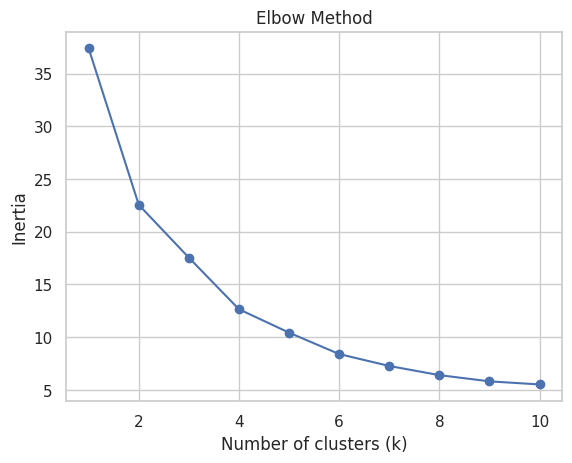

In [ ]:
X = df_scaled[numeric_cols].values
inertias = []
K = range(1, 11)

for k in K:
    centroids, labels, iters, inertia = kmeans(X, k, random_state=42)
    inertias.append(inertia)

plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
k = 5
centroids, labels, iters, inertia = kmeans(X, k, random_state=42)

df_scaled['Cluster'] = labels

print(f"K-Means completed in {iters} iterations with inertia = {inertia:.4f}")
display(df_scaled.head())


 Converged after 8 iterations
K-Means completed in 8 iterations with inertia = 10.4303


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,0.019231,0.000000,0.387755,1
1,2,Male,0.057692,0.000000,0.816327,1
2,3,Female,0.038462,0.008197,0.051020,2
3,4,Female,0.096154,0.008197,0.775510,1
4,5,Female,0.250000,0.016393,0.397959,1


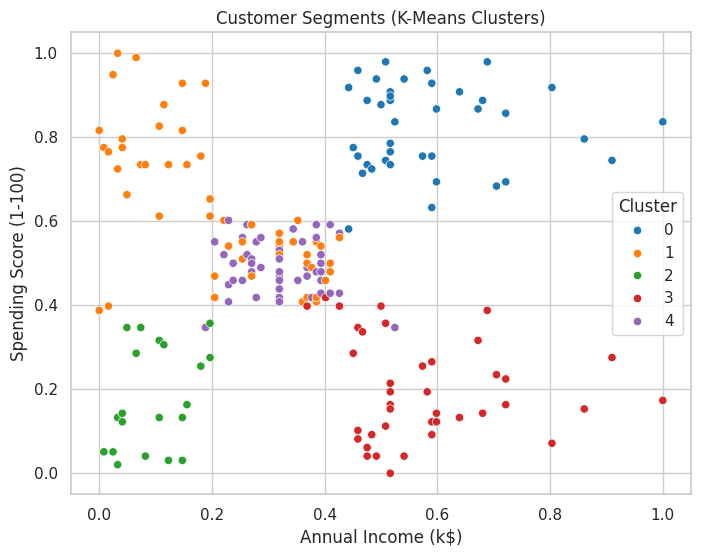

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    palette='tab10',
    data=df_scaled
)
plt.title('Customer Segments (K-Means Clusters)')
plt.show()


In [ ]:
cluster_summary = df.groupby(df_scaled['Cluster'])[numeric_cols].mean()
print(" Cluster Summary:")
display(cluster_summary)

for i, row in cluster_summary.iterrows():
    print(f"Cluster {i}: Age={row['Age']:.2f}, Income={row['Annual Income (k$)']:.2f}, Score={row['Spending Score (1-100)']:.2f}")


 Cluster Summary:


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,32.875000,86.100000,81.525000
1,25.185185,41.092593,62.240741
2,46.250000,26.750000,18.350000
3,39.875000,85.450000,19.875000
4,55.978261,54.260870,49.043478


Cluster 0: Age=32.88, Income=86.10, Score=81.53
Cluster 1: Age=25.19, Income=41.09, Score=62.24
Cluster 2: Age=46.25, Income=26.75, Score=18.35
Cluster 3: Age=39.88, Income=85.45, Score=19.88
Cluster 4: Age=55.98, Income=54.26, Score=49.04
